In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from scipy.ndimage import zoom
import matplotlib.gridspec as gridspec

# import sys
# sys.path.append('../Plotting/')
# sys.path.append('../Fonts/')
# sys.path.append('../Helpers/')
# sys.path.append('../obj/')
# sys.path.append('../Images/')
# sys.path.append('../FigureData/')

In [2]:
%matplotlib --list

# import matplotlib
# import matplotlib.pyplot as mpl
# import matplotlib.ticker
# import matplotlib.cm as cm

import MPLGUI as MP
%matplotlib inline

Available matplotlib backends: ['osx', 'qt4', 'qt5', 'gtk3', 'notebook', 'wx', 'qt', 'nbagg', 'gtk', 'tk', 'inline']


In [3]:
!pwd

/nfs/Data/Notebooks/Plotting


In [5]:
!pwd

/nfs/Data/Notebooks/Plotting


In [6]:
from IPython.display import Markdown as md

md("matplotlib documentation for this version: https://matplotlib.org/{}/".format(MP.matplotlib.__version__))

matplotlib documentation for this version: https://matplotlib.org/1.5.3/

In [7]:
# Find Absolute Bounds
T = np.array([[np.min(x), np.max(x)] for x in DataSets.values()])
# if np.min(T) < 0.0:
#     ZLimAll = (0.0, np.max(T))
# else:
#     ZLimAll = (np.min(T), np.max(T))
ZLimAll = (np.min(T), np.max(T))
print(ZLimAll)

(-1.0, 0.17040279429022295)


In [8]:
print("{} : {}".format(np.max(DataSets['AB']),np.where(DataSets['AB']==np.max(DataSets['AB']))))
print("{} : {}".format(np.max(DataSets['BA']),np.where(DataSets['BA']==np.max(DataSets['BA']))))

0.17040279429 : (array([18]), array([19]))
0.16799577965 : (array([18]), array([19]))


In [9]:
CurrentTimePoint

56347.5

In [10]:
# Settings = {"hpad": 0.3, "wpad": 0.3, "FontSize": 11, "ShowNormLine":False}

# gs1 = gridspec.GridSpec(nrows=2, ncols=2) #, left=0.05, right=0.48, wspace=0.05)

In [11]:
DataSets.keys()

['AA', 'AB', 'BA', 'BB']

In [12]:
FigureDir   = "./Figures"
ImgFileName = '{}/AssemblyModifiersAt{:.2f}.pdf'.format(FigureDir, CurrentTimePoint)

[-1.0, 0.15919243206270917]
[-84.000032756781664, -63.000065513563307, -42.000098270344964, -21.000131027126603]
0.01
1e-10
0.00112883789168
2.33572146909e-05
CPU times: user 9.95 s, sys: 539 ms, total: 10.5 s
Wall time: 10.6 s


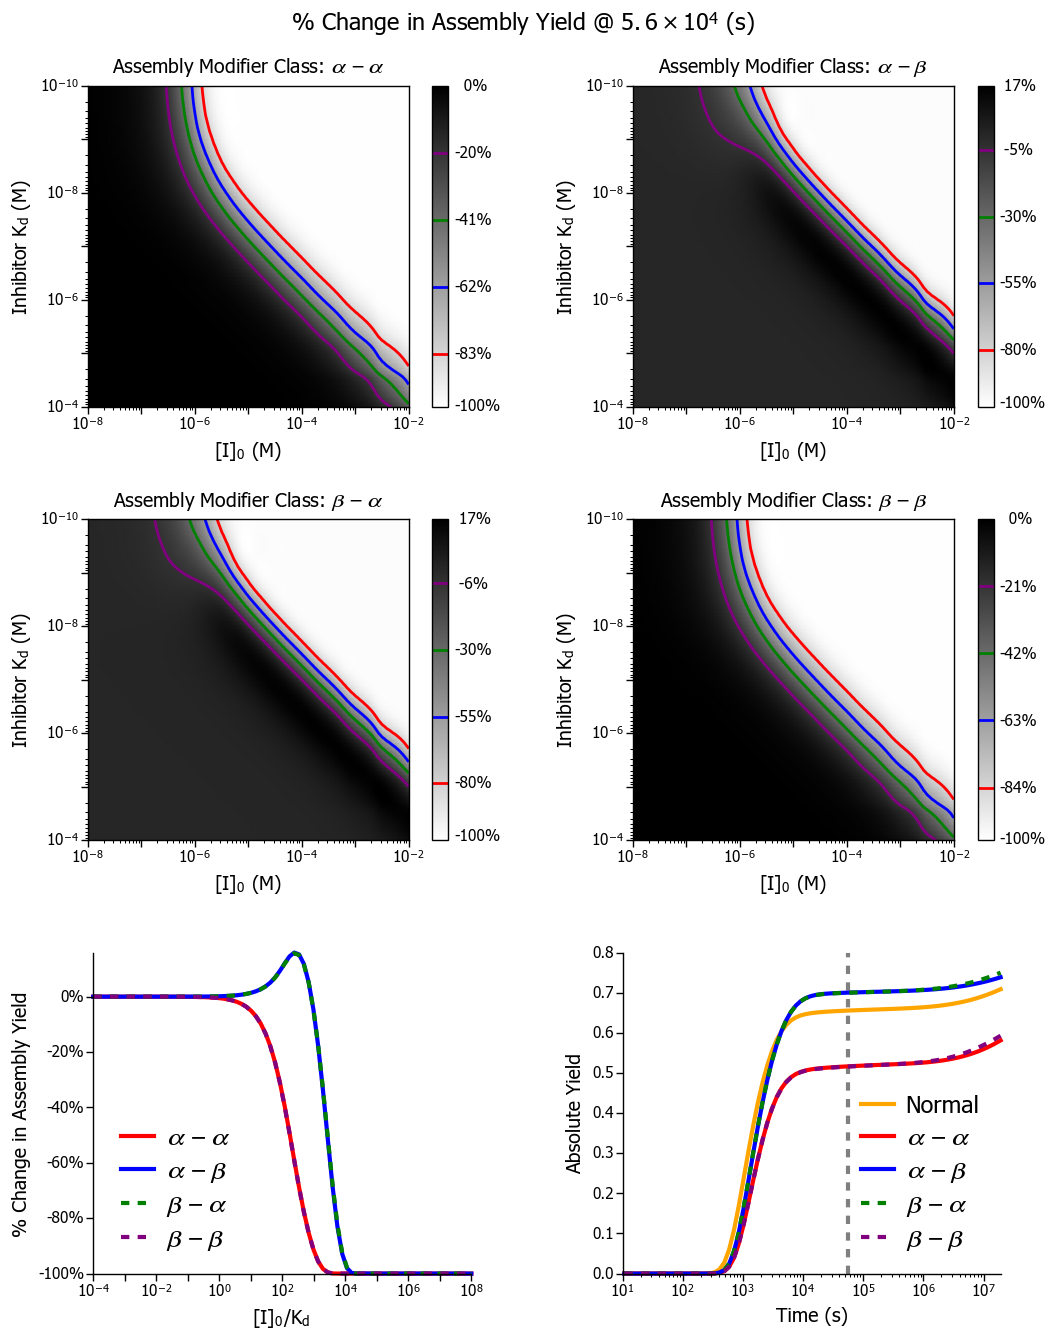

In [18]:
%%time
FontSize = 14
Settings = {"hpad": 0.35, "wpad": 0.15, "FontSize": FontSize, "ShowNormLine":False}
gs1 = gridspec.GridSpec(nrows=3, ncols=2)#, left=0.05, right=0.48, wspace=0.05)
LineWidth = 2.0

LinePlotDict = OrderedDict()
LinePlotDictXPoints = OrderedDict()

OverallMainPlot = MP.MPLGPU(
    Blank=True,
#     hpad=0.1,
#     wpad=0.1,
#     FontSize = FontSize,
    Width=MP.inches2mm(6.5),
    subplot=321,
    axes_aspect="equal",
    Aspect=4.0/3.0,
#     axes_aspect=16.0/12.0,
#     rasterized=True,
    **Settings
)

DataSetPlotLocations = {
    'AA':(gs1[0,0]),
    'AB':(gs1[0,1]),
    'BA':(gs1[1,0]),
    'BB':(gs1[1,1])
}
NameTypeSettings = { # Note: Using a greek font so a and b turn into alpha and beta
    "Alpha" : r"$\bf{a}$", 
    "Beta"  : r"$\bf{b}$",
    "Dash"  : r"$\,-$",
#     "Dash"  : r"$\bf-$",
}
DataSetFancyNames = {
    'AA':"{Alpha}{Dash}{Alpha}".format(**NameTypeSettings),
    'AB':"{Alpha}{Dash}{Beta}".format(**NameTypeSettings),
    'BA':"{Beta}{Dash}{Alpha}".format(**NameTypeSettings),
    'BB':"{Beta}{Dash}{Beta}".format(**NameTypeSettings),
}
# DataSetFancyNames = {
#     'AA':r"$\bf{\alpha}-\bf{\alpha}$",
#     'AB':r"$\bf{\alpha}-\bf{\beta}$",
#     'BA':r"$\bf{\beta}-\bf{\alpha}$",
#     'BB':r"$\bf\beta-\bf{\beta}$"
# }

for DataSetType in DataSets.keys():
    import matplotlib.gridspec as gridspec


    # Figure Settings
#     Title       = "Percent Change in Yield with {} Class".format(DataSetType)
    Title       = r"Assembly Modifier Class: {}".format(DataSetFancyNames[DataSetType])
    # XAxisLabel  = "[A{}] (M)".format(r"$\ \!_0$")
    # YAxisLabel  = "[B{}] (M)".format(r"$\ \!_0$")
    XAxisLabel  = r"$[I]_0$ (M)"
    YAxisLabel  = r"Inhibitor $K_d$ (M)"

    # XAxisLabel  = 'X - Axis'
    # YAxisLabel  = 'Y - Axis'

    # PointCount = 5e2
    # XAxisPoints = np.logspace(np.log10(XLim[0]), np.log10(XLim[1]), PointCount)
    # YAxisPoints = np.logspace(np.log10(YLim[0]), np.log10(YLim[1]), PointCount)
    
    # Params
    
    ZoomFactor = 4
    RoundingFactor = 20
    # Generate Plot Data
    XAxisPoints = zoom(I0s,ZoomFactor)
    YAxisPoints = zoom(KDIs[::-1],ZoomFactor)
    XLim = [XAxisPoints[0], XAxisPoints[-1]]
    YLim = [YAxisPoints[0], YAxisPoints[-1]]
    ContourData = zoom(np.round(DataSets[DataSetType][::-1,:],RoundingFactor),ZoomFactor)*100.0


#     XAxisPoints = np.array(I0s)
#     YAxisPoints = np.array(KDIs[::-1])
#     XLim = [XAxisPoints[0], XAxisPoints[-1]]
#     YLim = [YAxisPoints[0], YAxisPoints[-1]]
#     ContourData = DataSets[DataSetType][::-1,:]*100.0



#     ContourData = zoom(DataSets[DataSetType][::-1,:], ZoomFactor)*100.0
    
    LinePlotDict[DataSetType] = np.diagonal(ContourData)
    LinePlotDictXPoints[DataSetType] = XAxisPoints/YAxisPoints
    
    ZLim = [np.min(ContourData), np.max(ContourData)]
    if np.min(ContourData) < -100.0:
        ZLim = [-100.0, np.max(ContourData)]
    
#     ZLim = np.array(ZLimAll)*100.0
    Delta = (ZLim[1] - ZLim[0])
    ContourLevels = sorted([
            (1.0*Delta/5.0 + ZLim[0])*1.05,
            (2.0*Delta/5.0 + ZLim[0])*1.05,
            (3.0*Delta/5.0 + ZLim[0])*1.05,
            (4.0*Delta/5.0 + ZLim[0])*1.05,
    #         0.60,
    #         0.63,
    #         0.65,
            ])
#     ContourLevels = sorted([
#             100.0 * 0.80,
#             100.0 * 0.60,
#             100.0 * 0.40,
#             100.0 * 0.20,
#     #         0.60,
#     #         0.63,
#     #         0.65,
#             ])
#     Delta = ZLim[1] - ZLim[0]
#     ContourLevels = sorted([
#             100.0,
#             ZLim[0] + 1.0*Delta/4.0,
#             ZLim[0] + 2.0*Delta/4.0,
#             ZLim[0] + 3.0*Delta/4.0,
#     #         0.60,
#     #         0.63,
#     #         0.65,
#             ])
    Width = MP.inches2mm(3.25)
    Aspect=1.0
    ShiftRight = 0.0
    axes_aspect="equal"
    
    MainPlot = MP.ContourPlot(
        Width=Width,
        PrimaryFig=OverallMainPlot._MainFig,
        subplot=DataSetPlotLocations[DataSetType],
        Aspect=Aspect,
        axes_aspect=axes_aspect,
#         rasterized=True,
        **Settings
    )
#     MainPlot = MP.ContourPlot(
#         Width="single",
#     #     latex = False
#         )

#     MainPlot.SetXRange(1e-6,XLim[1])
#     MainPlot.SetYRange(1e-6,YLim[1])
    MainPlot.SetXRange(XLim[0],XLim[1])
    MainPlot.SetYRange(YLim[0],YLim[1])


    XTicks = MainPlot._Plot.xaxis.get_major_ticks()
    for Index in np.arange(0, len(XTicks),2):
        XTicks[Index].label1On = ""
    YTicks = MainPlot._Plot.yaxis.get_major_ticks()
    for Index in np.arange(0, len(YTicks),2):
        YTicks[Index].label1On = ""

    ColorMap = MP.mpl.cm.gray_r
#     ColorMap = MP.mpl.cm.seismic_r
#     ColorMap = MP.mpl.cm.gray_r
    
    ColorMap.set_bad('red',1.)

    ContourImage = MainPlot._Plot.pcolormesh(
        XAxisPoints,
        YAxisPoints,
        ContourData,
        cmap=ColorMap,
        shading = 'gouraud',
        rasterized = True,
        vmin=ZLim[0],
        vmax=ZLim[1]
    )

    ContourImage.autoscale()

    CLs = ContourLines =  MainPlot._Plot.contour(
        XAxisPoints,
        YAxisPoints,
        ContourData,
        ContourLevels,
        origin='lower',
        linewidths=LineWidth,
        colors=(
            'red',
            'blue',
            'green',
            'purple',
        )
    )

    # MainPlot._Plot.clabel(
    #     ContourLines,
    #     ContourLevels,
    #     inline=True,
    #     fmt='%.1f',
    #     fontsize=7,
    #     orientation='horizontal',
    #     rightside_up = True,
    #     inline_spacing = 30.0,
    # )

    Colorbar = MP.mpl.colorbar(
        ContourImage,
    #     ticklocation = [],
        ticks = [ZLim[0],ZLim[1]]+ContourLevels,
#         format = '%1.1f',
        format = '%3d%%',
        drawedges = False,
        orientation = 'vertical',
    #     shrink=0.8,
    #     extend='neither'
    )

    MainPlot._Plot.tick_params(
            which = 'major',
            labelsize=FontSize*0.8,
            pad = 1.5, # How far are the labels from the mark
    )

    Colorbar.ax.tick_params(which='both',length=0, labelsize=FontSize*0.8)
#     Colorbar.ax.tick_params(which='both',length=0)
    # Colorbar.ax.set_xticks([ZLim[0],ZLim[1]]+ContourLevels)
    Colorbar.add_lines(CLs)
    # Colorbar.set_ticks(ContourLevels)
    Colorbar.update_ticks()

    MainPlot._Plot.set_title(Title, fontsize=FontSize, y = 1.02)
    MainPlot.XLabel(XAxisLabel, fontsize=FontSize)
    MainPlot.YLabel(YAxisLabel, fontsize=FontSize)

    Colorbar.ax.set_position(np.array(Colorbar.ax.get_position().bounds) + [ShiftRight,0.0,0,0])
    MainPlot._Plot.set_position(np.array(MainPlot._Plot.get_position().bounds) + [ShiftRight,0.0,0,0])
    
#     MainPlot._MainFig.show()

F, M = "{:.1e}".format(CurrentTimePoint).split("e")
if M[0] == "+":
    M = M[1:]
while M[0] == "0":
    M = M[1:]
FTPoint = r"${}\times10^{{{}}}$".format(F, M)
if int(M) < 2:
    FTPoint = r"${:.1f}$".format(CurrentTimePoint)


OverallMainPlot._MainFig.suptitle(
    "% Change in Assembly Yield @ {} (s)".format(FTPoint),
    fontsize=FontSize*1.2,
    y=0.95
)

# MainPlot.SaveFig(ImgFileName,
#                  bbox_inches = 'tight',
#                  transparent=True
#                 )

    # MainPlot.DisallowLatex()

#     MP.mpl.show()

# Figure Settings
FigureDir   = "./Figures"
Title       = "% Change in Assembly Yield vs I0 over Kd".format(DataSetType)
# ImgFileName = '{}/Line-{} at {:.2f}.pdf'.format(FigureDir, Title, CurrentTimePoint)

# XAxisLabel  = r'$\frac{[I]_0}{K_d}$ '
XAxisLabel  = r'$[I]_0/K_d$ '

# XAxisLabel  = r'$[I]_0K_d^{-1}$ '
YAxisLabel  = '% Change in Assembly Yield'

# XAxisPoints = zoom(np.array(I0s)/np.array(KDIs[::-1]),ZoomFactor)
XAxisPoints = LinePlotDictXPoints.values()[0]

XLim = [np.min(XAxisPoints), np.max(XAxisPoints)]
# XLim = [1e3,1e4]

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

# Aspect=4.0/3.0

LineWidth = 3.0

Margins = 0.155
RShift = 0.0185
gs2 = gridspec.GridSpec(
    nrows=3,
    ncols=2,
    left=Margins+RShift,
    right=1.0-Margins+RShift,
    wspace=0.4
)

MainPlot = MP.LinePlot(
    Width = MP.inches2mm(3.25),
    subplot=gs2[2,0],
    PrimaryFig=MainPlot._MainFig,
    Aspect=4.0/3.0,
#     axes_aspect="equal",
    YAxisInPercent = True,
#         rasterized=True,
    **Settings
)
# MainPlot = MP.LinePlot(
#     Width="single",
#     YAxisInPercent = True,
#     )

YMin = 0.0
YMax = 0.0
for DS in DataSets.viewkeys():
    CYMin = np.min(LinePlotDict[DS]/100.0)
    if CYMin < YMin:
        YMin = CYMin
    CYMax = np.max(LinePlotDict[DS]/100.0)
    if CYMax > YMax:
        YMax = CYMax
        
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["AA"]/100.0,
    label=DataSetFancyNames["AA"],
    color="red",
    clip_on=False,
#     alpha=0.5,
    zorder=0,
    linestyle = '-',
    linewidth=LineWidth,
    )
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["AB"]/100.0,
    label=DataSetFancyNames["AB"],
    color="blue",
    clip_on=False,
#     alpha=0.5,
    zorder=0,
    linestyle = '-',
    linewidth=LineWidth,
    )
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["BA"]/100.0,
    label=DataSetFancyNames["BA"],
    color="green",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = '--',
    linewidth=LineWidth,
    )
MainPlot.AddLine(
    XAxisPoints,
    LinePlotDict["BB"]/100.0,
    label=DataSetFancyNames["BB"],
    color="Purple",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = '--',
    linewidth=LineWidth,
    )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
#     loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    loc = "lower left",
    labelspacing = 0.4,
    handletextpad = 0.2
)

YLim = [YMin, YMax]
if YMin < -1.0:
    YLim = [-1.0, YMax]

MainPlot._Plot.tick_params(
        which = 'major',
        labelsize=FontSize*0.8,
        pad = 1.5, # How far are the labels from the mark
)

print YLim    
MainPlot.SetYRange(YLim[0],YLim[1])

MainPlot.SetXRange(XLim[0],XLim[1])

XTicks = MainPlot._Plot.xaxis.get_major_ticks()
for Index in np.arange(0, len(XTicks),2):
    XTicks[Index].label1On = ""

MainPlot.XLabel(XAxisLabel, fontsize=FontSize)
MainPlot.YLabel(YAxisLabel, fontsize=FontSize)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# CPlot = np.array(MainPlot._Plot.get_position().bounds)*[1.0,1.0,0.8,1.0] + [0.11,0.0,0,0]
# MainPlot._Plot.set_position(CPlot)
# del CPlot

# MainPlot._MainFig.show()
# MainPlot.SaveFig(ImgFileName,
#                  bbox_inches = 'tight',
#                  transparent=True
#                 )
# MP.mpl.show()



print(ContourLevels)

ZLimAll

print(I0s[-1])
print(KDIs[0])

ParamData.keys()[:2]

# Figure Settings
# FigureDir   = "./Figures"
Title       = "Yield vs Time".format(DataSetType)
# ImgFileName = '{}/Line-{}-Double.pdf'.format(FigureDir, Title)

XAxisLabel  = 'Time (s)'
YAxisLabel  = 'Absolute Yield'

XAxisPoints = PossibleTimePoints

# XLim = [np.min(XAxisPoints), np.max(XAxisPoints)]
# XLim = [1e1, 1e8]
XLim = [10.0,np.max(XAxisPoints)]

XBounds = (XLim[0] <= XAxisPoints) & (XAxisPoints <= XLim[1])
XAxisPoints = XAxisPoints[XBounds]

I0 = I0s[16]
KDI = KDIs[17]

print(I0)
print(KDI)


# Aspect=4.0/3.0
MainPlot = MP.LinePlot(
    Width = MP.inches2mm(3.25),
    subplot=gs2[2,1],
    PrimaryFig=MainPlot._MainFig,
    Aspect=4.0/3.0,
#     axes_aspect="equal",
    YAxisInPercent = False,
#         rasterized=True,
    **Settings
)
# MainPlot = MP.LinePlot(
#     Width="single",
#     YAxisInPercent = True,
#     )
# MainPlot = MP.LinePlot(
#     Width="double",
#     YAxisInPercent = False,
#     )

MainPlot.AddLine(
    XAxisPoints,
    NoInhibitorValues[:,1][XBounds],
    label="Normal",
    color="orange",
    clip_on=False,
#     alpha=0.5,
    zorder=0,
    linestyle = '-',
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    # Multiplied by No Inhibitor DataSet to remove relative yield.
#     ParamData["{}_Params_{:1.2e}_{:1.2e}".format('AA', float(I0), float(KDI))]['Result'][:,1][XBounds]*NoInhibitorValues[:,1][XBounds],
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('AA', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label=DataSetFancyNames["AA"],
    color="red",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = '-',
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('AB', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label=DataSetFancyNames["AB"],
    color="blue",
    clip_on=False,
#     alpha=0.5,
    zorder=1,
    linestyle = '-',
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('BA', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label=DataSetFancyNames["BA"],
    color="green",
    clip_on=False,
#     alpha=0.5,
    zorder=2,
    linestyle = '--',
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
#     ParamData["{}_Params_{:1.2e}_{:1.2e}".format('BB', float(I0), float(KDI))]['Result'][:,1][XBounds]/NoInhibitorValues[:,1][XBounds],
    ParamData["{}_Params_{:1.2e}_{:1.2e}".format('BB', float(I0), float(KDI))]['RawResult'][:,1][XBounds],
    label=DataSetFancyNames["BB"],
    color="purple",
    clip_on=False,
#     alpha=0.5,
    zorder=2,
    linestyle = '--',
    linewidth = LineWidth
    )

MainPlot._Plot.axvline(
    CurrentTimePoint,
    color="grey",
    zorder=0.0,
    linewidth=LineWidth,
    alpha = 1.0,
    linestyle = "--",
)

LegendAdjust = (22.0, -10.0)
MainPlot.AddLegend(
#     loc = "best",
    loc = "lower right",
#     loc = "upper left",
    labelspacing = 0.4,
    handletextpad = 0.2
    )

MainPlot.SetXRange(XLim[0],XLim[1])
# MainPlot.SetYRange(0.0,1.1)

MainPlot._Plot.tick_params(
        which = 'major',
        labelsize=FontSize*0.8,
        pad = 1.5, # How far are the labels from the mark
)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)

# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# CPlot = np.array(MainPlot._Plot.get_position().bounds)*[1.0,1.0,0.8,1.0] + [0.035,0.0,0,0]
# MainPlot._Plot.set_position(CPlot)
# del CPlot

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )